In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## 0. Making the artificial data

In [2]:
from sklearn.datasets import make_blobs

In [3]:
np.random.seed(1234)

In [4]:
n_dim = 2
x_train, y_train = make_blobs(n_samples=100, n_features=n_dim, centers=[[1,1],[-1,-1]], shuffle=True)
x_test, y_test = make_blobs(n_samples=30, n_features=n_dim, centers=[[1,1],[-1,-1]], shuffle=True)

In [5]:
print(x_train[:10,:])
print(y_train[:10])

[[-3.08526564  0.93024677]
 [ 1.40545341  1.28909194]
 [ 1.35402033  0.96448697]
 [ 1.01569637 -1.24268495]
 [-2.47311641 -1.89658062]
 [-0.37122417 -0.81350565]
 [-1.78110528 -1.46801767]
 [-1.4507651  -0.25083619]
 [-0.18387277  0.89353447]
 [-0.06898878  0.48811869]]
[1 0 0 0 1 1 1 1 1 0]


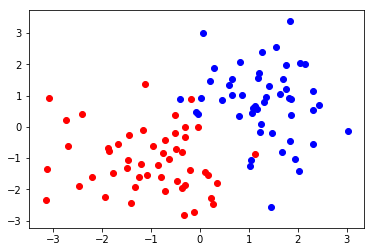

In [6]:
# Training data
plt.figure()
plt.scatter(x_train[(y_train==0),0], x_train[(y_train==0),1], c='blue', marker='o')
plt.scatter(x_train[(y_train==1),0], x_train[(y_train==1),1], c='red', marker='o')

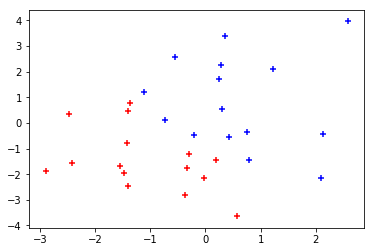

In [7]:
# Test data
plt.figure()
plt.scatter(x_test[(y_test==0),0], x_test[(y_test==0),1], c='blue', marker='+')
plt.scatter(x_test[(y_test==1),0], x_test[(y_test==1),1], c='red', marker='+')

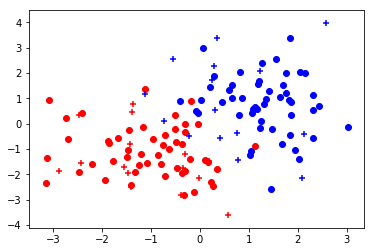

In [8]:
# Training data + Test data
plt.figure()
plt.scatter(x_train[(y_train==0),0], x_train[(y_train==0),1], c='blue', marker='o')
plt.scatter(x_train[(y_train==1),0], x_train[(y_train==1),1], c='red', marker='o')
plt.scatter(x_test[(y_test==0),0], x_test[(y_test==0),1], c='blue', marker='+')
plt.scatter(x_test[(y_test==1),0], x_test[(y_test==1),1], c='red', marker='+')

## 1. Logistic regression

In [9]:
# Logistic function (a.k.a., softmax function, sigmoid function)
def logistic(x):
    return 1.0 / (1 + np.exp(-x))

In [10]:
def logit(x, beta):
    logit = np.dot(x, beta)
    return logit

In [11]:
beta = [0.1, -0.1]
y_hat = logistic(logit(x=x_train, beta=beta)) # Y = 1일 확률
print(y_hat[:10])
print(y_train[:10])

[ 0.40093969  0.502909    0.5097371   0.55622078  0.4855906   0.51105523
  0.49217345  0.47003772  0.47309084  0.48607591]
[1 0 0 0 1 1 1 1 1 0]


In [12]:
def negative_log_likelihood(x, y, beta, avg=False):
    y_hat = logistic(logit(x=x_train, beta=beta))
    log_likelihood = y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)
    if not avg:
        return -log_likelihood
    else:
        return np.mean(-log_likelihood)

In [13]:
loss = negative_log_likelihood(x=x_train, y=y_train, beta=beta)
print(loss)

[ 0.91394425  0.69898218  0.71281351  0.8124281   0.7223894   0.6712776
  0.70892409  0.75494233  0.74846785  0.66567972  0.75605519  0.77074811
  0.64535098  0.65383749  0.57569066  0.67647867  0.68874046  0.84679756
  0.63866006  0.59085049  0.69423565  0.85124149  0.67530831  0.75203237
  0.87953064  0.7022032   0.82523673  0.81401086  0.69493173  0.70828261
  0.71423112  0.61170278  0.67316966  0.6923738   0.72320923  0.68542304
  0.6932292   0.75066904  0.72579561  0.80346862  0.6751765   0.63116504
  0.65705893  0.78665339  0.66379138  0.70108291  0.61929797  0.71930395
  0.77971827  0.67821442  0.67441024  0.73807277  0.71068698  0.56628199
  0.61851314  0.74365191  0.72378566  0.59807502  0.6329705   0.64897353
  0.80426387  0.74704017  0.91468706  0.82552243  0.68232878  0.66953302
  0.70222402  0.71742527  0.70700835  0.71577288  0.85289574  0.68229194
  0.78421815  0.6748539   0.78650847  0.7074115   0.7205191   0.71607019
  0.63020887  0.75327663  0.74890245  0.6688089   0.

## 2. Learning logistic regression model
- Using batch gradient descent method

In [14]:
def logistic_regression(x, y, num_steps=50, learning_rate=0.01):
    initial_beta = [10, 10]
    beta = initial_beta
    for step in range(num_steps):
        y_hat = logistic(logit(x=x_train, beta=beta))
        gradient = np.dot(x.T, y_hat - y)
        beta = beta - learning_rate * gradient
        loss = negative_log_likelihood(x, y, beta, avg=True)
        print('[%d steps] loss %g' % (step, loss))
    return beta, initial_beta

In [15]:
beta, initial_beta = logistic_regression(x=x_train, y=y_train, num_steps=1000, learning_rate=0.01)

[0 steps] loss inf
[1 steps] loss inf
[2 steps] loss 14.4212
[3 steps] loss 12.1915
[4 steps] loss 9.96513
[5 steps] loss 7.74704
[6 steps] loss 5.54828
[7 steps] loss 3.40793
[8 steps] loss 1.51228
[9 steps] loss 0.488308
[10 steps] loss 0.292321
[11 steps] loss 0.231628
[12 steps] loss 0.200996
[13 steps] loss 0.182153
[14 steps] loss 0.169214
[15 steps] loss 0.159682
[16 steps] loss 0.152306
[17 steps] loss 0.146389
[18 steps] loss 0.141512
[19 steps] loss 0.137403
[20 steps] loss 0.133882
[21 steps] loss 0.13082
[22 steps] loss 0.128128
[23 steps] loss 0.125736
[24 steps] loss 0.123593
[25 steps] loss 0.121659
[26 steps] loss 0.119902
[27 steps] loss 0.118298
[28 steps] loss 0.116826
[29 steps] loss 0.115469
[30 steps] loss 0.114214
[31 steps] loss 0.113048
[32 steps] loss 0.111963
[33 steps] loss 0.110949
[34 steps] loss 0.109999
[35 steps] loss 0.109107
[36 steps] loss 0.108268
[37 steps] loss 0.107477
[38 steps] loss 0.10673
[39 steps] loss 0.106023
[40 steps] loss 0.105353
[41 

[921 steps] loss 0.0838045
[922 steps] loss 0.0838045
[923 steps] loss 0.0838044
[924 steps] loss 0.0838044
[925 steps] loss 0.0838043
[926 steps] loss 0.0838043
[927 steps] loss 0.0838043
[928 steps] loss 0.0838042
[929 steps] loss 0.0838042
[930 steps] loss 0.0838041
[931 steps] loss 0.0838041
[932 steps] loss 0.0838041
[933 steps] loss 0.083804
[934 steps] loss 0.083804
[935 steps] loss 0.0838039
[936 steps] loss 0.0838039
[937 steps] loss 0.0838039
[938 steps] loss 0.0838038
[939 steps] loss 0.0838038
[940 steps] loss 0.0838038
[941 steps] loss 0.0838037
[942 steps] loss 0.0838037
[943 steps] loss 0.0838037
[944 steps] loss 0.0838036
[945 steps] loss 0.0838036
[946 steps] loss 0.0838035
[947 steps] loss 0.0838035
[948 steps] loss 0.0838035
[949 steps] loss 0.0838034
[950 steps] loss 0.0838034
[951 steps] loss 0.0838034
[952 steps] loss 0.0838033
[953 steps] loss 0.0838033
[954 steps] loss 0.0838033
[955 steps] loss 0.0838032
[956 steps] loss 0.0838032
[957 steps] loss 0.0838032
[95

/Users/kth/anaconda3/envs/ml_edu/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


In [16]:
print(initial_beta)
print(beta)

[10, 10]
[-4.71455267 -2.42170358]


In [17]:
# Comes from Kyunghyun Cho's ML lecture (https://github.com/nyu-dl/Intro_to_ML_Lecture_Note)
def vis_hyperplane(beta, style='k--'):

    lim0 = plt.gca().get_xlim()
    lim1 = plt.gca().get_ylim()
    m0, m1 = lim0[0], lim0[1]

    intercept0 = -(beta[0] * m0 + beta[-1])/beta[1]
    intercept1 = -(beta[0] * m1 + beta[-1])/beta[1]
    
    plt1, = plt.plot([m0, m1], [intercept0, intercept1], style)

    plt.gca().set_xlim(lim0)
    plt.gca().set_ylim(lim1)
        
    return plt1

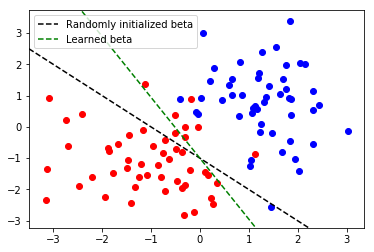

In [19]:
# Training data + Hyperplane
plt.figure()
plt.scatter(x_train[(y_train==0),0], x_train[(y_train==0),1], c='blue', marker='o')
plt.scatter(x_train[(y_train==1),0], x_train[(y_train==1),1], c='red', marker='o')

initial_beta_plot = vis_hyperplane(initial_beta, 'k--')
beta_plot = vis_hyperplane(beta, 'g--')

plt.legend([initial_beta_plot, beta_plot], ['Randomly initialized beta', 'Learned beta'])

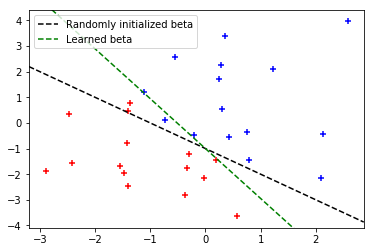

In [20]:
# Test data + Hyperplane
plt.figure()
plt.scatter(x_test[(y_test==0),0], x_test[(y_test==0),1], c='blue', marker='+')
plt.scatter(x_test[(y_test==1),0], x_test[(y_test==1),1], c='red', marker='+')

initial_beta_plot = vis_hyperplane(initial_beta, 'k--')
beta_plot = vis_hyperplane(beta, 'g--')

plt.legend([initial_beta_plot, beta_plot], ['Randomly initialized beta', 'Learned beta'])

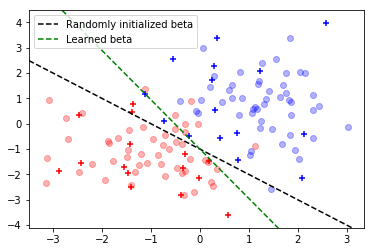

In [21]:
# Training data + Test data
plt.figure()
plt.scatter(x_train[(y_train==0),0], x_train[(y_train==0),1], c='blue', marker='o', alpha=0.3)
plt.scatter(x_train[(y_train==1),0], x_train[(y_train==1),1], c='red', marker='o', alpha=0.3)
plt.scatter(x_test[(y_test==0),0], x_test[(y_test==0),1], c='blue', marker='+')
plt.scatter(x_test[(y_test==1),0], x_test[(y_test==1),1], c='red', marker='+')

initial_beta_plot = vis_hyperplane(initial_beta, 'k--')
beta_plot = vis_hyperplane(beta, 'g--')

plt.legend([initial_beta_plot, beta_plot], ['Randomly initialized beta', 'Learned beta'])